Final Weights: [1.02626946]
Final Bias: -0.9556169597293863


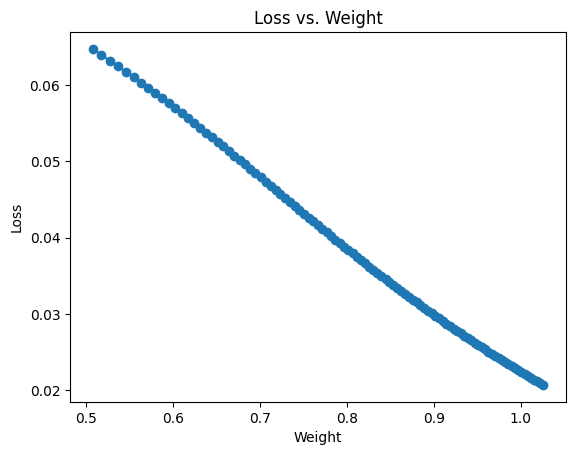

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to initialize random weights and biases
def initialize_parameters(input_size):
    np.random.seed(42)
    weights = np.random.randn(input_size, 1)
    bias = np.random.randn(1)
    return weights, bias

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward pass through the neural network
def forward(X, weights, bias):
    return sigmoid(np.dot(X, weights) + bias)

# Calculate squared error loss
def calculate_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Update parameters using batch gradient descent
def update_parameters(X, y, weights, bias, learning_rate):
    m = X.shape[0]
    
    # Forward pass
    y_pred = forward(X, weights, bias)
    
    # Compute gradients
    error = y_pred - y
    delta_weights = (1/m) * np.dot(X.T, error)
    delta_bias = (1/m) * np.sum(error)
    
    # Update weights and bias
    weights -= learning_rate * delta_weights
    bias -= learning_rate * delta_bias
    
    return weights, bias

# Generate synthetic dataset
X = np.array([[0.5], [2.5]])
y = np.array([[0.2], [0.9]])

# Initialize parameters
weights, bias = initialize_parameters(X.shape[1])

# Hyperparameters
learning_rate = 0.1
epochs = 100

# Lists to store loss and weight values for plotting
loss_history = []
weight_values = []

# Training loop
for epoch in range(epochs):
    # Forward pass and calculate loss
    y_pred = forward(X, weights, bias)
    loss = calculate_loss(y, y_pred)
    
    # Update parameters
    weights, bias = update_parameters(X, y, weights, bias, learning_rate)
    
    # Store loss and weight for plotting
    loss_history.append(loss)
    weight_values.append(weights[0, 0])

# Display final weights and bias
print(f"Final Weights: {weights.flatten()}")
print(f"Final Bias: {bias[0]}")

# Plot loss w.r.t. weight values
plt.plot(weight_values, loss_history, marker='o')
plt.xlabel('Weight')
plt.ylabel('Loss')
plt.title('Loss vs. Weight')
plt.show()
